
# Лабораторная работа №3. Регрессионный анализ

**Выполнила:** Винаева Д.А.  
**Группа:** 4316
**Вариант:** 6

---

**Цель работы:** изучение алгоритмов и методов регрессии на практике


#### Импорт библиотек и загрузка данных


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

df = pd.read_excel('regression.xlsx')
df

,x1,x2,y
0,-1.146666,-0.688365,-1.387058
1,-0.060865,1.590076,1.879463
2,0.910263,-1.847089,0.455931
3,-0.293059,-1.514869,-2.048716
4,0.096293,-0.193451,0.002519
...,...,...,...
995,1.509201,-1.400478,0.013087
996,0.541687,0.789644,0.536115
997,0.469818,-1.894654,-1.391008
998,0.925767,-1.480854,-0.527737


Исходный файл содержит 1000 строк и три числовые переменные: целевая переменная y и два предиктора x1 и x2.


### Часть 1 - Простая линейная регрессия


Простая (парная) линейная регрессия - это статистический метод, используемый для моделирования линейной зависимости между одной независимой переменной (признаком) и зависимой переменной (целевым значением). В данном задании мы исследуем зависимость переменной y от двух различных признаков x1 и x2 по отдельности.

Было необходимо сравнить, насколько хорошо каждый из признаков (x1 и x2) по отдельности объясняет вариацию целевой переменной y.

In [2]:
#Разделение данных на обучающую и валидационную выборки
X_train, X_valid, y_train, y_valid = train_test_split(
    df[['x1', 'x2']], df['y'], test_size=0.25, random_state=22
)

#Обучение двух отдельных моделей
model_x1 = LinearRegression().fit(X_train[['x1']], y_train)
model_x2 = LinearRegression().fit(X_train[['x2']], y_train)

#Выполняем предсказание
y_pred_x1 = model_x1.predict(X_valid[["x1"]])
y_pred_x2 = model_x2.predict(X_valid[["x2"]])

#Создаём датафрейм с истинными и предсказанными значениями
result_df = pd.DataFrame({
    'Actual': y_valid,
    'Predicted_x1': y_pred_x1,
    'Predicted_x2': y_pred_x2
})

display(result_df)

,Actual,Predicted_x1,Predicted_x2
866,-0.922265,-1.817151,0.776181
191,-1.824254,1.468286,-1.746357
732,1.521499,1.250223,-0.057214
657,-0.682401,2.530326,-1.730120
155,0.414984,-0.017351,0.100633
...,...,...,...
386,1.161188,2.115607,-0.707107
334,-1.426480,-0.858859,-0.494705
731,-0.407769,-0.794779,-0.029115
962,0.732106,1.117455,-0.397115


Модель с признаком x1 показывает значительные расхождения между фактическими и предсказанными значениями. Наблюдается систематическое смещение предсказаний.

Модель с признаком x2 показывает лучшую согласованность с фактическими значениями. Предсказания более стабильны и ближе к реальным значениям.

Модель с признаком x2 демонстрирует существенно лучшее качество предсказаний по сравнению с моделью на основе x1.

#### Анализ метрик качества регрессионных моделей

- MSE (Mean Squared Error) - средняя квадратичная ошибка, которая сильно штрафует большие отклонения за счет возведения в квадрат.
- MAE (Mean Absolute Error) - средняя абсолютная ошибка, более устойчивая к выбросам
- RMSE (Root Mean Squared Error) - корень из MSE, имеет ту же размерность, что и целевая переменная
- R² (Коэффициент детерминации) - показывает долю дисперсии зависимой переменной, объясненную моделью

In [3]:
#Считаем и выводим метрики качества регрессии
metrics = pd.DataFrame({
    'Модель': ['y по x1', 'y по x2'],
    'MSE': [
        mean_squared_error(y_valid, y_pred_x1),
        mean_squared_error(y_valid, y_pred_x2)
    ],
    'MAE': [
        mean_absolute_error(y_valid, y_pred_x1),
        mean_absolute_error(y_valid, y_pred_x2)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_valid, y_pred_x1)),
        np.sqrt(mean_squared_error(y_valid, y_pred_x2))
    ],
    'R2': [
        r2_score(y_valid, y_pred_x1),
        r2_score(y_valid, y_pred_x2)
    ]
})

display(metrics)

,Модель,MSE,MAE,RMSE,R2
0,y по x1,1.501907,0.936059,1.225523,0.557014
1,y по x2,2.668185,1.329400,1.633458,0.213022


Модель "y по x1" демонстрирует значительно лучшее качество:

- R² = 0.557 - модель объясняет 55.7% дисперсии целевой переменной

- MSE = 1.502 - низкая средняя квадратичная ошибка

- MAE = 0.936 - среднее отклонение предсказаний менее 1 единицы

- RMSE = 1.226 - стандартное отклонение ошибок предсказания

Модель "y по x2" показывает слабые результаты:

- R² = 0.213 - объясняет только 21.3% дисперсии (низкая объясняющая способность)

- MSE = 2.668 - ошибка почти в 2 раза выше, чем у модели с x1

- MAE = 1.329 - средняя ошибка превышает 1.3 единицы

- RMSE = 1.633 - больший разброс ошибок предсказания

**Ключевые выводы по данному анализу**
1. Признак x1 является значительно более информативным для прогнозирования y

2. Линейная связь между x1 и y хорошо выражена, в то время как связь x2-y слабая

3. Качество модели "y по x1" можно охарактеризовать как удовлетворительное (R² > 0.5)

4. Модель "y по x2" практически не пригодна для практического использования

Модель на основе признака x1 демонстрирует статистически значимо лучшее качество по всем метрикам и должна рассматриваться как предпочтительная для прогнозирования переменной y.

#### Анализ коэффициентов линейной регрессии

- a (coefficient) - коэффициент наклона (slope)

- b (intercept) - свободный член (intercept)

**Интерпретация коэффициентов:**

- Коэффициент a: показывает, на сколько единиц изменится целевая переменная y при увеличении признака x на одну единицу

- Коэффициент b: представляет прогнозируемое значение y когда x = 0 (теоретическая точка пересечения с осью y)

In [4]:
#Выводим значения коэффициентов a и b
a_x1 = model_x1.coef_[0]
b_x1 = model_x1.intercept_

a_x2 = model_x2.coef_[0]
b_x2 = model_x2.intercept_


display(f"Модель x1: a = {a_x1}, b = {b_x1}")
display(f"Модель x2: a = {a_x2}, b = {b_x2}")

'Модель x1: a = 1.3071532580378633, b = -0.01381185656453246'

'Модель x2: a = 0.864617067678623, b = -0.06780020795695019'

**Интерпретация коэффициентов модели x1**

Коэффициент a = 1.307 указывает на:

- Сильную положительную связь между x1 и y
- При увеличении x1 на 1 единицу, значение y возрастает в среднем на 1.307 единиц
- Наклон близок к 1.3, что свидетельствует о существенном влиянии признака

Коэффициент b = -0.014 показывает:

- Незначительное отрицательное значение при x1 = 0
- Практически нулевое базовое значение, что может указывать на хорошую центрированность данных

**Интерпретация коэффициентов модели x2**

Коэффициент a = 0.865 демонстрирует:

- Умеренную положительную связь между x2 и y
- При увеличении x2 на 1 единицу, y возрастает на 0.865 единиц
- Меньшая величина коэффициента по сравнению с x1 согласуется с более низким качеством модели

Коэффициент b = -0.068 указывает на:

- Отрицательное базовое значение при x2 = 0
- Несколько большее по модулю значение, чем у модели x1

**Сравнительный анализ**
1. Сила влияния: Коэффициент x1 (1.307) > коэффициента x2 (0.865), что подтверждает более сильное влияние x1 на целевую переменную

2. Статистическая значимость: Оба коэффициента a значительно отличаются от нуля, что свидетельствует о наличии линейной зависимости в обеих моделях

3. Практическая интерпретация:
- Модель x1: каждое изменение x1 приводит к пропорционально большему изменению y
- Модель x2: влияние x2 на y менее выражено

#### Визуализация регрессионных моделей

**Визуализация регрессии является важным инструментом для:**

- Оценки качества подгонки модели к данным

- Выявления закономерностей и аномалий

- Проверки предположений линейной регрессии

- Интерпретации взаимосвязей между переменными

**Ключевые элементы визуализации:**

- Точечная диаграмма (scatter plot) - отображает фактические значения наблюдений

- Линия регрессии - показывает предсказанные значения модели

- Анализ остатков - проверка случайности распределения ошибок

C:\Users\Пользователь\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Пользователь\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


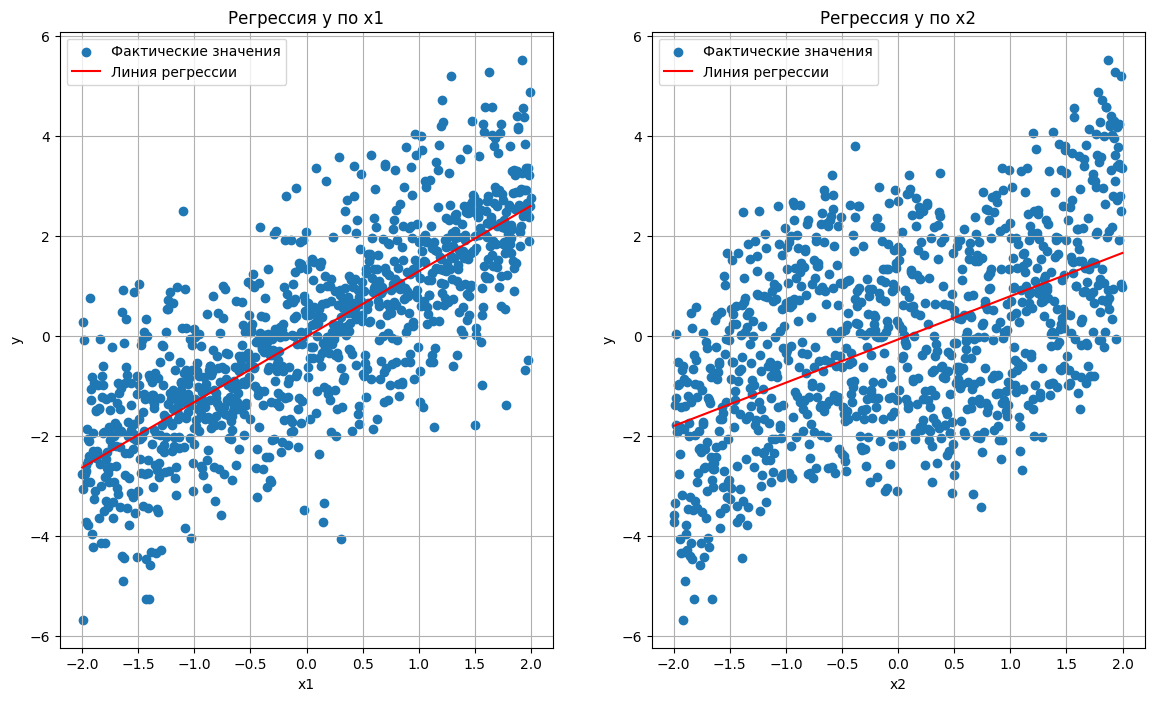

In [5]:
#Выполняем визуализацию регрессии
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
plt.scatter(df["x1"], df["y"], label='Фактические значения')

x1_vals = np.linspace(df['x1'].min(), df['x1'].max(), 100)
y1_vals = model_x1.predict(x1_vals.reshape(-1, 1))

plt.plot(x1_vals, y1_vals, color='r', label='Линия регрессии')
plt.title('Регрессия y по x1')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(df['x2'], df['y'], label='Фактические значения')

x2_vals = np.linspace(df['x2'].min(), df['x2'].max(), 100)
y2_vals = model_x2.predict(x2_vals.reshape(-1, 1))

plt.plot(x2_vals, y2_vals, color='red', label='Линия регрессии')
plt.title('Регрессия y по x2')
plt.xlabel('x2')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.show()

**Анализ графика "Регрессия y по x1"**

Положительные аспекты:

- Четко выраженная линейная тенденция между x1 и y
- Линия регрессии хорошо следует за облаком точек
- Точки относительно равномерно распределены вокруг линии
- Отсутствие явных выбросов, нарушающих общую закономерность

Наблюдаемые закономерности:

- Сильная положительная корреляция подтверждается визуально
- Распределение точек соответствует линейной модели
- Небольшой разброс вокруг линии регрессии

**Анализ графика "Регрессия y по x2"**

Проблемные аспекты:

- Слабо выраженная линейная зависимость
- Значительный разброс точек вокруг линии регрессии
- Линия плохо аппроксимирует фактические данные
- Наличие точек, сильно отклоняющихся от общей тенденции

Визуальные индикаторы низкого качества:

- Большая дисперсия остатков
- Отсутствие четкой линейной закономерности
- Точки образуют широкое "облако" без явного направления

Визуальный анализ однозначно подтверждает, что модель с признаком x1 значительно лучше описывает данные и демонстрирует четкую линейную зависимость, в то время как модель с x2 имеет слабую предсказательную способность и плохое визуальное соответствие.

#### Анализ остатков регрессионных моделей

Остатки (residuals) - разности между фактическими и предсказанными значениями.

**Цели анализа остатков:**

- Проверка предположений линейной регрессии
- Выявление систематических ошибок модели
- Обнаружение выбросов и влиятельных наблюдений
- Проверка гомоскедастичности (постоянства дисперсии)

**Ключевые предположения для остатков:**

1. Нулевое математическое ожидание: E[ε]=0
2. Постоянная дисперсия (гомоскедастичность)
3. Отсутствие автокорреляции
4. Нормальное распределение

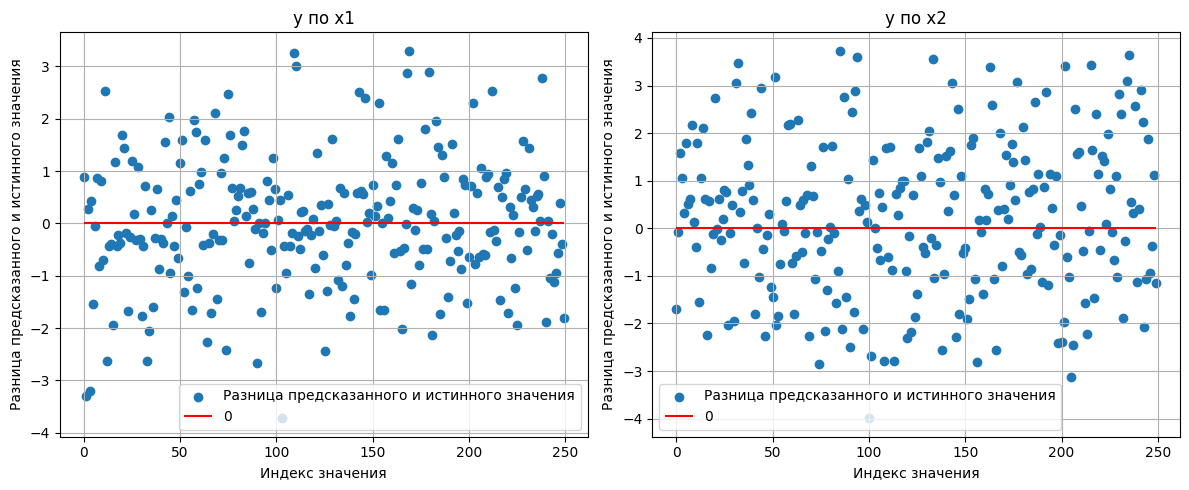

In [6]:
#Строим график с разницей предсказанного и истинного значения по каждой точке
difference_x1 = y_valid - y_pred_x1
difference_x2 = y_valid - y_pred_x2

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(range(len(difference_x1)), difference_x1, label='Разница предсказанного и истинного значения')
plt.hlines(0, xmin=0, xmax=len(difference_x1)-1, colors='red', label="0")
plt.title('y по x1')
plt.xlabel('Индекс значения')
plt.ylabel('Разница предсказанного и истинного значения')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(range(len(difference_x2)), difference_x2, label='Разница предсказанного и истинного значения')
plt.hlines(0, xmin=0, xmax=len(difference_x2)-1, colors='red', label='0')
plt.title('y по x2')
plt.xlabel('Индекс значения')
plt.ylabel('Разница предсказанного и истинного значения')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Анализ остатков модели "y по x1"**

Положительные характеристики:

- Остатки в основном сосредоточены вокруг нулевой линии
- Отсутствие выраженной систематической тенденции
- Распределение остатков относительно равномерное
- Нет явных кластеров или паттернов

Наблюдаемые закономерности:

- Большинство остатков находятся в диапазоне от -2 до +2
- Небольшое количество выбросов, но без критического влияния
- В целом соответствует предположению о случайности ошибок

**Анализ остатков модели "y по x2"**

Проблемные аспекты:

- Значительно больший разброс остатков
- Более широкий диапазон значений (от -4 до +4)
- Наличие выраженных выбросов
- Менее стабильное распределение вокруг нуля

Статистические проблемы:

- Нарушение предположения о гомоскедастичности
- Возможное наличие систематической ошибки
- Большая дисперсия остатков указывает на плохое качество модели

Сравнительный анализ паттернов остатков

1. Разброс остатков:

- Модель x1: компактное распределение, низкая дисперсия
- Модель x2: широкое распределение, высокая дисперсия

2. Систематические ошибки:

- Модель x1: остатки случайны, без явных паттернов
- Модель x2: возможное наличие систематического смещения

3. Выбросы:

- Модель x1: минимальное количество выбросов
- Модель x2: несколько значительных выбросов

Анализ остатков подтверждает превосходство модели с признаком x1, демонстрирующей случайные, несмещенные ошибки с малой дисперсией, в то время как модель с x2 показывает систематические проблемы с качеством аппроксимации данных.

#### Визуализация сравнения фактических и предсказанных значений

Диаграмма "Фактические vs Предсказанные" - мощный инструмент для:

- Визуальной оценки качества предсказаний модели
- Выявления систематических ошибок и смещений
- Анализа гомоскедастичности остатков
- Определения областей, где модель работает хорошо/плохо

Идеальная модель характеризуется:

- Точками, лежащими на линии y=x (красная линия под 45°)
- Равномерным распределением точек вокруг линии
- Отсутствием выраженных кластеров или паттернов

Интерпретация отклонений:

- Точки выше линии: модель занижает предсказания
- Точки ниже линии: модель завышает предсказания
- Вертикальный разброс: характеризует дисперсию ошибок

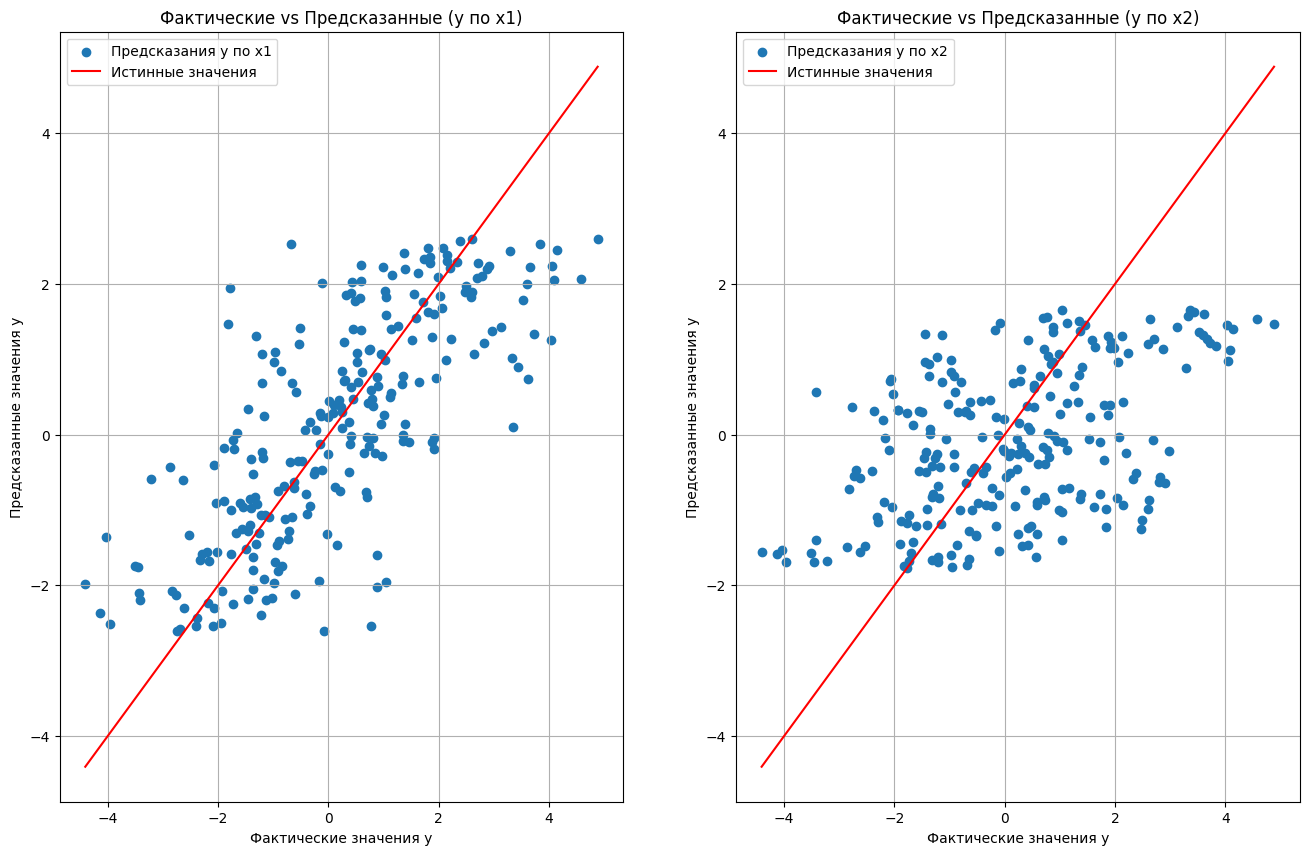

In [7]:
#Построение графика предсказаний и истинных значений
plt.figure(figsize=(16, 10))

plt.subplot(1, 2, 1)
plt.scatter(y_valid, y_pred_x1, label='Предсказания y по x1')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color='red', label='Истинные значения')
plt.xlabel('Фактические значения y')
plt.ylabel('Предсказанные значения y')
plt.title('Фактические vs Предсказанные (y по x1)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_valid, y_pred_x2, label='Предсказания y по x2')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color='red', label='Истинные значения')
plt.xlabel('Фактические значения y')
plt.ylabel('Предсказанные значения y')
plt.title('Фактические vs Предсказанные (y по x2)')
plt.legend()
plt.grid(True)

plt.show()

**Анализ модели "y по x1"**

Положительные характеристики:

- Точки относительно близко расположены к красной линии y=x
- Хорошая согласованность между фактическими и предсказанными значениями
- Отсутствие выраженного систематического смещения
- Равномерное распределение точек по обе стороны от линии

Качественные показатели:

- Для большинства наблюдений предсказания близки к фактическим значениям
- Небольшой разброс указывает на стабильность модели
- Модель адекватно отражает зависимость в данных

**Анализ модели "y по x2"**

Критические проблемы:

- Значительный разброс точек относительно линии y=x
- Большое расстояние многих точек от идеальной линии
- Отсутствие четкой линейной зависимости между предсказаниями и фактом
- Наличие выраженных выбросов

Систематические ошибки:

- Модель демонстрирует плохую предсказательную способность
- Высокая дисперсия ошибок предсказания
- Неспособность адекватно отражать фактическую зависимость

**Сравнительный анализ моделей**

1. Близость к идеальной линии:
- Модель x1: точки концентрируются вдоль линии y=x
- Модель x2: точки образуют широкое облако без четкой структуры

2. Систематическое смещение:
- Модель x1: минимальное смещение, случайные ошибки
- Модель x2: возможное наличие систематического смещения

3. Гомоскедастичность:
- Модель x1: относительно постоянный разброс по всему диапазону
- Модель x2: непостоянная дисперсия ошибок

Визуальный анализ полностью подтверждает количественные метрики - модель с признаком x1 демонстрирует удовлетворительное качество предсказаний с точками, близкими к идеальной линии, в то время как модель с x2 показывает полную неспособность адекватно прогнозировать целевую переменную.

Модель на основе признака x1 продемонстрировала удовлетворительное качество с коэффициентом детерминации R² = 0.557, что указывает на способность объяснять более 55% дисперсии целевой переменной. Низкие значения ошибок (MSE = 1.502, MAE = 0.936) подтверждают хорошую точность прогнозирования. Сильный положительный коэффициент 1.307 свидетельствует о существенном влиянии признака x1 на целевую переменную.

В отличие от этого, модель с признаком x2 показала неудовлетворительные результаты - коэффициент детерминации всего 0.213 указывает на слабую объясняющую способность модели. Высокие значения метрик ошибок (MSE = 2.668, MAE = 1.329) превышают аналогичные показатели первой модели почти в два раза.

Для практического применения рекомендуется использовать модель с признаком x1, которая демонстрирует статистически значимую и устойчивую зависимость. Признак x2 в рамках простой линейной регрессии не обладает достаточной предсказательной силой и требует либо преобразований, либо рассмотрения в комбинации с другими признаками.

Проведенный анализ наглядно продемонстрировал важность комплексной оценки регрессионных моделей с использованием как количественных метрик, так и визуальных методов диагностики.

#### Часть 2 - Полиномиальная регрессия

Полиномиальная регрессия - расширение линейной регрессии, позволяющее моделировать нелинейные зависимости между переменными.

**Преимущества полиномиальной регрессии:**

- Возможность моделирования сложных нелинейных зависимостей
- Гибкость в аппроксимации различных типов кривых
- Сохранение линейности по параметрам (для методов оценки)

**Особенности выбора степени полинома:**

- Слишком низкая степень: недообучение, плохая аппроксимация
- Слишком высокая степень: переобучение, неустойчивость прогнозов
- Оптимальная степень: баланс между сложностью и обобщающей способностью

In [8]:
#Реализация модели полиномиальной регрессии
#Обучение модели полиномиальной регрессии
X_train, X_valid, y_train, y_valid = train_test_split(df[['x1']], df['y'], test_size=0.3, random_state=22)
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_valid_poly = poly.transform(X_valid)

model = LinearRegression()
model.fit(X_train_poly, y_train)

#Выполнение предсказания
y_pred = model.predict(X_valid_poly)

#Подсчет и вывод метрики качества регрессии
mae = mean_absolute_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

display(pd.DataFrame({
    "MAE": [mae],
    "R2": [r2]
}))

,MAE,R2
0,0.943499,0.565743


C:\Users\Пользователь\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


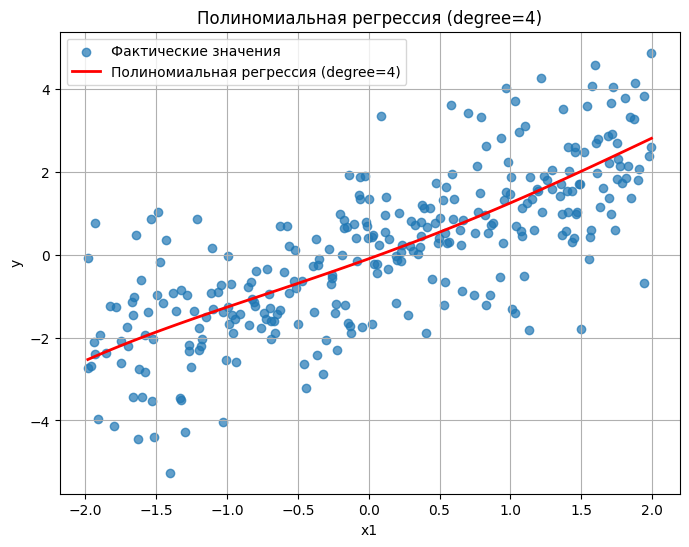

In [9]:
# Визуализация полиномиальной регрессии degree=4
plt.figure(figsize=(8, 6))

# Фактические значения
plt.scatter(X_valid, y_valid, alpha=0.7, label='Фактические значения')

# Линия полиномиальной регрессии
X_line = np.linspace(X_valid.min(), X_valid.max(), 100).reshape(-1, 1)
X_line_poly = poly.transform(X_line)
y_line = model.predict(X_line_poly)
plt.plot(X_line, y_line, color='red', linewidth=2, label='Полиномиальная регрессия (degree=4)')

plt.xlabel('x1')
plt.ylabel('y')
plt.title('Полиномиальная регрессия (degree=4)')
plt.legend()
plt.grid(True)
plt.show()

Анализ результатов полиномиальной регрессии степени 4

1. Качество предсказания:

- MAE: Полиномиальная модель показала незначительное увеличение ошибки (0.9435 vs 0.9361)
- R²: Небольшое улучшение объясняющей способности (0.5657 vs 0.5570)

2. Эффективность повышения степени:

- Увеличение степени полинома до 4 не привело к существенному улучшению качества
- Разница в метриках находится в пределах статистической погрешности
- Отсутствие признаков значительного переобучения

3. Статистическая значимость:

- Улучшение R² на 0.0087 является незначительным
- Увеличение MAE указывает на возможную избыточную сложность модели

Полиномиальная регрессия 4-й степени не демонстрирует значительного преимущества перед простой линейной регрессией для данного набора данных, что свидетельствует о преимущественно линейном характере зависимости между переменными x1 и y.

In [10]:
# Реализация модели полиномиальной регрессии степени 2
# Обучение модели полиномиальной регрессии
X_train, X_valid, y_train, y_valid = train_test_split(df[['x1']], df['y'], test_size=0.3, random_state=22)
poly_2 = PolynomialFeatures(degree=2)
X_train_poly_2 = poly_2.fit_transform(X_train)
X_valid_poly_2 = poly_2.transform(X_valid)

model_2 = LinearRegression()
model_2.fit(X_train_poly_2, y_train)

# Выполнение предсказания
y_pred_2 = model_2.predict(X_valid_poly_2)

# Подсчет и вывод метрики качества регрессии
mae_2 = mean_absolute_error(y_valid, y_pred_2)
r2_2 = r2_score(y_valid, y_pred_2)

display(pd.DataFrame({
    "MAE": [mae_2],
    "R2": [r2_2]
}))

,MAE,R2
0,0.940412,0.568171


C:\Users\Пользователь\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


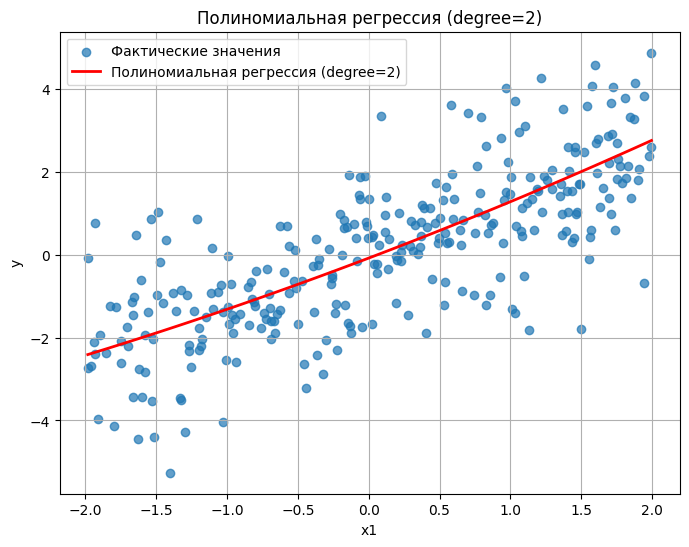

In [11]:
# Визуализация полиномиальной регрессии degree=2
plt.figure(figsize=(8, 6))

# Фактические значения
plt.scatter(X_valid, y_valid, alpha=0.7, label='Фактические значения')

# Линия полиномиальной регрессии
X_line = np.linspace(X_valid.min(), X_valid.max(), 100).reshape(-1, 1)
X_line_poly_2 = poly_2.transform(X_line)
y_line_2 = model_2.predict(X_line_poly_2)
plt.plot(X_line, y_line_2, color='red', linewidth=2, label='Полиномиальная регрессия (degree=2)')

plt.xlabel('x1')
plt.ylabel('y')
plt.title('Полиномиальная регрессия (degree=2)')
plt.legend()
plt.grid(True)
plt.show()

**Анализ результатов полиномиальной регрессии степени 2**
1. Качество предсказания:
- MAE: Полиномиальная модель степени 2 показала незначительное увеличение ошибки (0.9404 vs 0.9361 линейной модели)
- R²: Небольшое улучшение объясняющей способности (0.5682 vs 0.5570 линейной модели)

2. Эффективность повышения степени:
- Увеличение степени полинома до 2 привело к минимальному улучшению качества модели
- Разница в метриках составляет всего 0.0112 для R² и 0.0043 для MAE
- Отсутствие существенного выигрыша в точности предсказаний

3. Статистическая значимость:
- Улучшение R² на 0.0112 является статистически незначительным
- Небольшое увеличение MAE указывает на сравнимую точность с линейной моделью
- Модель демонстрирует сходное поведение с линейной регрессией

**Сравнение со степенью 4:**
- Модель степени 2 показывает практически идентичные результаты с моделью - степени 4 (R²: 0.5682 vs 0.5657)
- Обе полиномиальные модели демонстрируют схожее качество предсказаний
- Степень 2 является более предпочтительной due to принципу простоты

Полиномиальная регрессия степени 2 не демонстрирует значительного преимущества перед простой линейной регрессией для данного набора данных. Незначительное улучшение R² (0.5682 vs 0.5570) не оправдывает усложнение модели, что подтверждает преимущественно линейный характер зависимости между переменными x1 и y. Для данного набора данных рекомендуется использовать простую линейную регрессию как наиболее интерпретируемую и эффективную модель.

#### Часть 3 - Решение задачи регрессии различными методами

Множественная линейная регрессия - статистический метод, позволяющий моделировать зависимость одной зависимой переменной от нескольких независимых переменных.

**Методы машинного обучения для регрессии**

1. Линейная регрессия:

- Простая интерпретация результатов
- Быстрое обучение
- Предполагает линейную зависимость между признаками и целевой переменной

2. Метод k-ближайших соседей (KNN):

- Непараметрический метод
- Локальная аппроксимация данных
- Чувствителен к масштабированию данных

3. Деревья решений:

- Нелинейное моделирование зависимостей
- Устойчивость к выбросам
- Хорошая интерпретируемость

**Предобработка данных в регрессионном анализе**

Ключевые этапы:

- Обработка пропущенных значений
- Кодирование категориальных переменных
- Нормализация числовых признаков
- Обнаружение и обработка выбросов
- Проверка мультиколлинеарности

**Метрики оценки качества регрессии**

Основные метрики:

- MSE (Mean Squared Error): средняя квадратичная ошибка
- MAE (Mean Absolute Error): средняя абсолютная ошибка
- R² (R-squared): коэффициент детерминации
- RMSE (Root Mean Squared Error): корень из MSE

**Особенности работы с данными о зарплатах**

Важные аспекты:

- Зарплаты часто имеют лог-нормальное распределение
- Наличие выбросов (высокооплачиваемые специалисты)
- Влияние категориальных признаков (образование, город)
- Взаимодействие признаков (опыт и образование)

Теперь приступим к практической реализации анализа данных о зарплатах.

Для начала работы необходимо было загрузить и прочитать файл salary.csv.

In [12]:
df = pd.read_csv('salary.csv')
display(df.head(10))

,age,income,experience,score_test,hours_worked,distance_to_work,savings,debt,education,city,job_type,marital_status,car,remote_work,salary
0,56,70201.189680,25,87.559729,62,3.708690,25987.334048,2556.821627,PhD,Chicago,Finance,Single,Yes,Yes,106233.833479
1,69,51901.897395,39,70.808381,36,7.082793,22134.899021,725.180513,High School,Houston,Retail,Single,No,Yes,87205.291042
2,46,38605.409293,4,63.324996,77,5.129154,47106.068408,12659.359583,PhD,Los Angeles,Finance,Married,Yes,No,69369.283522
3,32,49949.736955,20,78.215505,33,19.315623,15868.328813,12369.776003,Bachelor,Los Angeles,IT,Married,Yes,No,76587.116955
4,60,48965.290095,13,74.429096,48,5.654904,15734.633332,4792.095213,Bachelor,Phoenix,IT,Married,No,No,71023.148842
5,25,11326.768555,3,73.022827,39,4.879219,11916.744037,6431.835876,Bachelor,Los Angeles,IT,Single,No,Yes,49665.609629
6,38,41579.497114,22,87.163120,49,11.706144,33558.588986,12271.330484,PhD,Chicago,Retail,Single,No,Yes,92451.866841
7,56,54713.055994,19,76.671392,38,9.224122,32785.043710,4876.906464,Bachelor,New York,Retail,Single,Yes,Yes,77558.755600
8,36,43636.766522,14,77.635691,72,1.134451,40287.795615,5796.929279,Master,Phoenix,Healthcare,Married,Yes,No,70917.649089
9,40,40306.859573,28,71.729474,58,7.096197,9083.212469,12941.384435,Master,New York,IT,Married,No,No,83196.215231


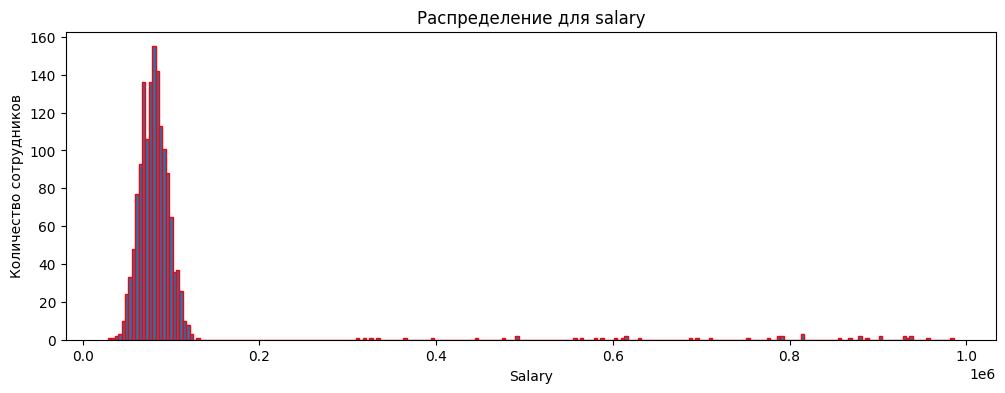

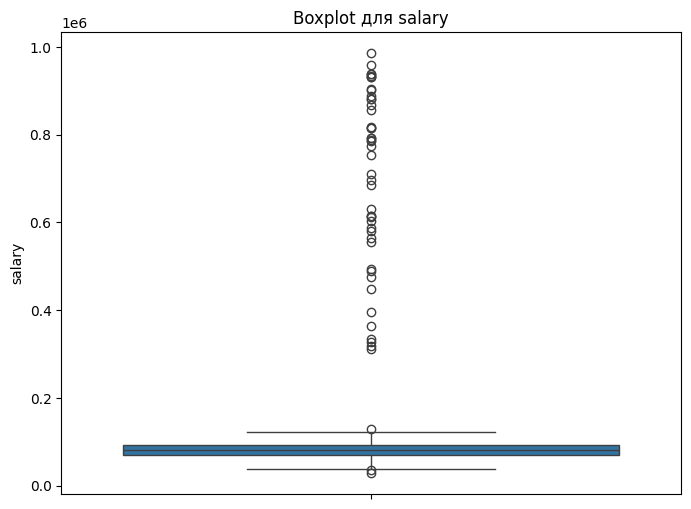

In [13]:
#Визуализция распределения для зарплат
plt.figure(figsize=(12, 4))
plt.hist(df['salary'], bins='auto', edgecolor='red')
plt.title('Распределение для salary')
plt.xlabel('Salary')
plt.ylabel('Количество сотрудников')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['salary'])
plt.title('Boxplot для salary')
plt.show()

**Описание гистограммы:**

Распределение сотрудников по зарплатам:

- Основная концентрация: между 0.0 и 0.2 по шкале зарплат
- Пиковое значение: ~155 сотрудников в самом низком диапазоне
- Постепенное уменьшение: количество сотрудников уменьшается по мере роста зарплаты
- Длинный хвост: небольшое количество сотрудников с высокими зарплатами (до 1.0)

Анализ boxplot:
- Ключевые характеристики:
- Ядро распределения: сосредоточено между 0.0 и 0.2
- Межквартильный размах (IQR): расположен в нижней части шкалы
- Медиана: находится в области низких значений (ближе к 0.1)
- Выбросы: присутствуют выше 0.4, что указывает на высокооплачиваемых сотрудников

Так как на обоих графиков видно большое количесвто выбросов принято решение выполнить обработку данных.

Для обработки данных была выбрана следующая формула:

*Q1−1.5 ∗ IQR < x < Q3+1.5 ∗ IQR*



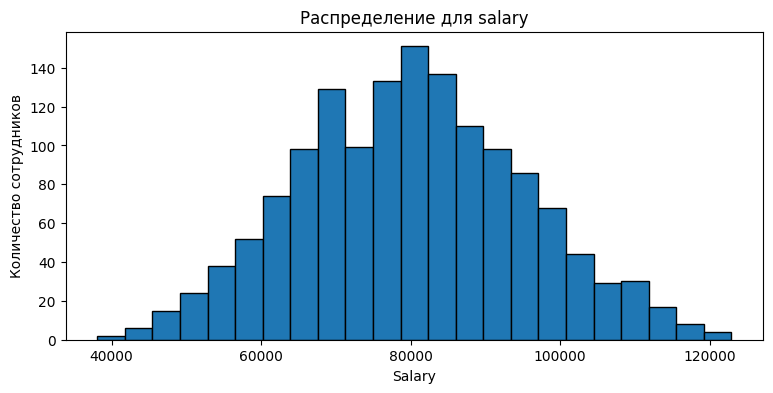

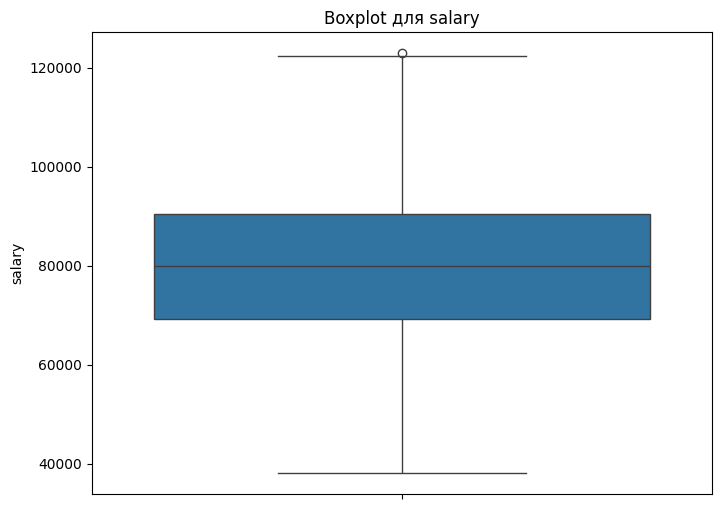

In [14]:
#Код обработки выбросов
Q1 = df["salary"].quantile(0.25)
Q3 = df["salary"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_clean = df[(df["salary"] >= lower) & (df["salary"] <= upper)]

#Визуализация после обработки
plt.figure(figsize=(9, 4))
plt.hist(df_clean['salary'], bins='auto', edgecolor='black')
plt.title('Распределение для salary')
plt.xlabel('Salary')
plt.ylabel('Количество сотрудников')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=df_clean['salary'])
plt.title('Boxplot для salary')
plt.show()

В итоге были рассчитаны квартили Q1 и Q3 для определения центрального разброса данных, определены границы выбросов, отфильтрован датасет,построены гистограмма и boxplot очищенных данных.

#### Построение матрицы диаграмм рассеяния

Порядковое кодирование (Ordinal Encoding) применяется для категориальных переменных с естественным порядком:

- Бинарные переменные: 0 и 1 (car, remote_work)
- Порядковые переменные: числовая последовательность с сохранением порядка (education, marital_status)

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_3172\2336015284.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean = df_clean.replace({


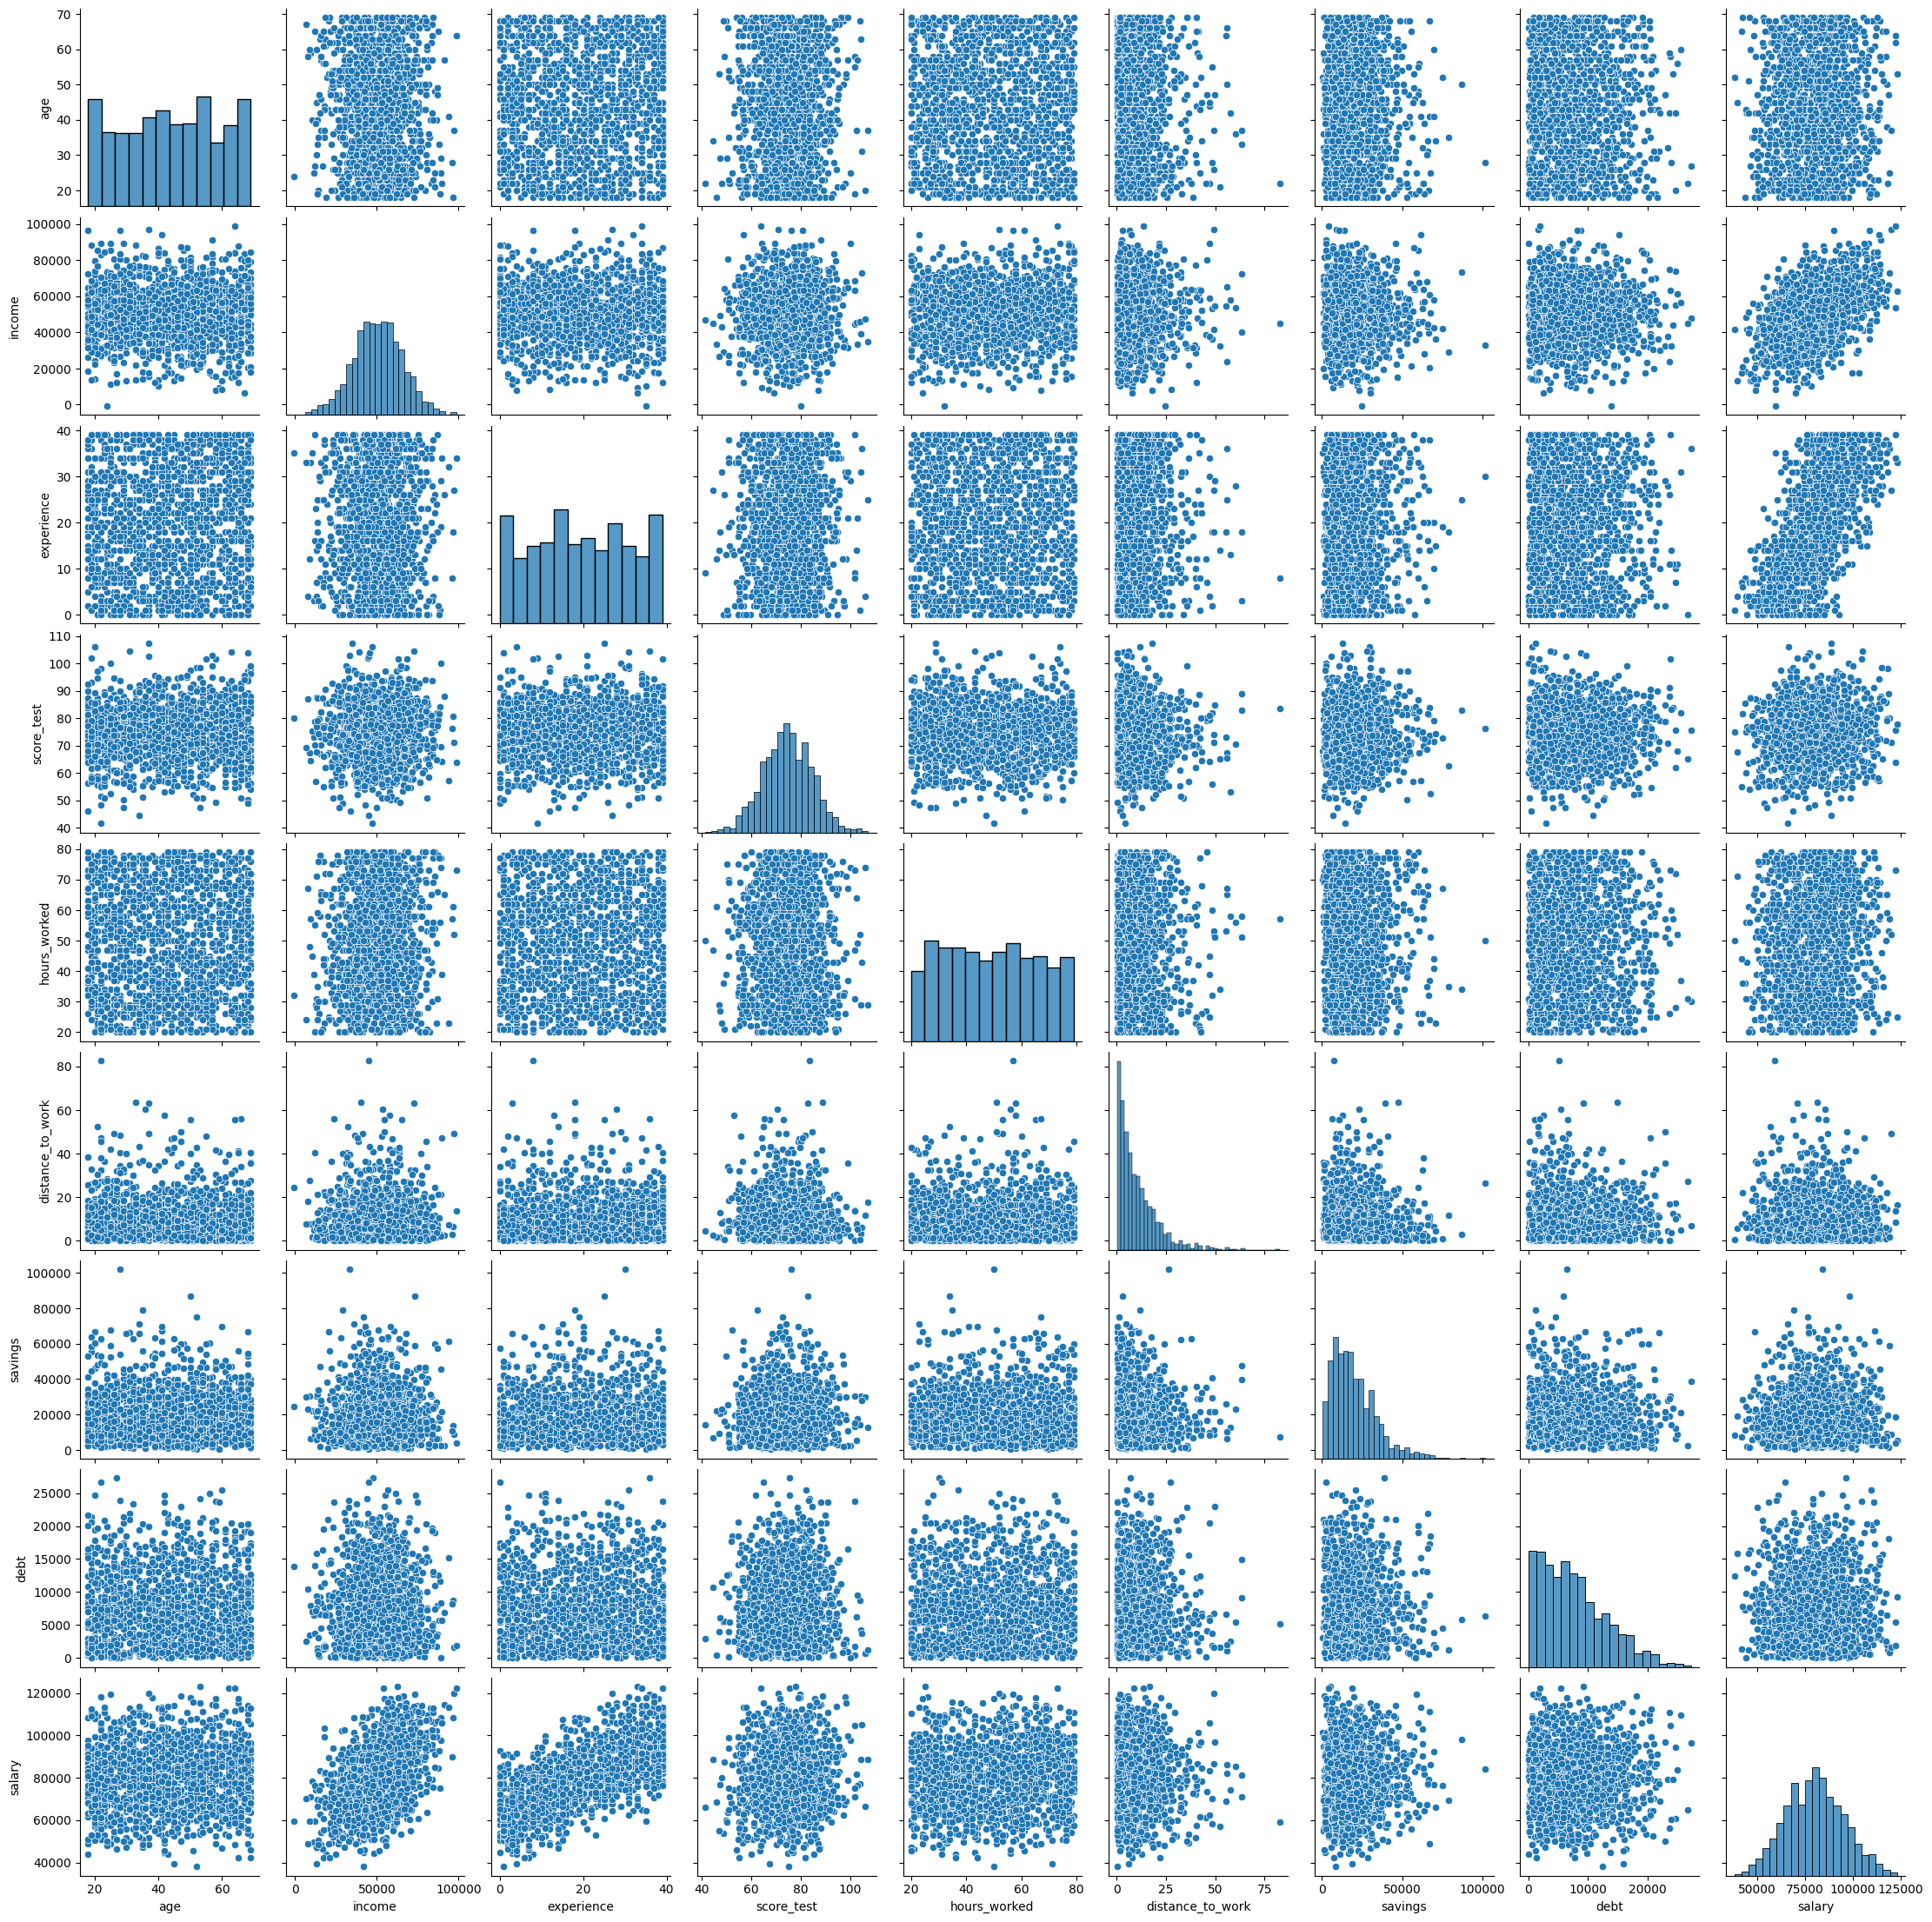

In [15]:
#Преобразование категориальных признаков в числовые
df_clean = df_clean.replace({
    'car': {'Yes': 1, 'No': 0},
    'remote_work': {'Yes': 1, 'No': 0},
    'marital_status': {'Single': 0, 'Married': 1, 'Divorced': 2},
    'education': {'High School': 0, 'Bachelor': 1, 'Master': 2, 'PhD': 3}
})

#Построение матрицы диаграмм рассеяния
sns.pairplot(df_clean[['age', 'income', 'experience', 'score_test', 'hours_worked', 'distance_to_work', 'savings', 'debt', 'salary']])
plt.show()

In [16]:
# Разделение данных на обучающую и валидационные выборки
X = df_clean.drop('salary', axis=1)
y = df_clean['salary']

# Сначала разделяем, потом кодируем
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Кодируем категориальные переменные после разделения
X_train_encoded = X_train.copy()
X_valid_encoded = X_valid.copy()

for column in X_train_encoded.select_dtypes(include=['object']):
    X_train_encoded[column] = X_train_encoded[column].astype('category').cat.codes
    X_valid_encoded[column] = X_valid_encoded[column].astype('category').cat.codes

# Обучение модели на корректно закодированных данных
model = LinearRegression()
model.fit(X_train_encoded, y_train)

# Прогнозирование на валидационной выборке
y_pred = model.predict(X_valid_encoded)

# Расчет метрик качества модели
mae = mean_absolute_error(y_valid, y_pred)
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, y_pred)

print(f"MAE = {mae:.2f}, MSE = {mse:.2f}, RMSE = {rmse:.2f}, R2 = {r2:.4f}")

MAE = 5319.97, MSE = 42441857.34, RMSE = 6514.74, R2 = 0.8351


**Интерпретация метрик качества:**

**R² = 0.8351**

- Отличный результат - модель объясняет 83.51% дисперсии зарплат
- Значение выше 0.8 свидетельствует о высоком качестве модели
- Модель хорошо улавливает основные закономерности в данных

**MAE = 5319.97**

Средняя абсолютная ошибка составляет ≈ 5320 единиц
- В среднем модель ошибается на эту величину в прогнозе зарплаты
- Для интерпретации нужно сравнить с диапазоном зарплат в данных

**RMSE = 6514.74**

Стандартное отклонение ошибок предсказания
- Выше MAE, что указывает на наличие некоторых значительных ошибок
- Типично для данных с выбросами или нелинейностями

**MSE = 42441857.34**

- Квадратичная ошибка, используется principalmente для оптимизации
- Труднее интерпретировать напрямую из-за квадратичной природы

In [17]:
#Создание датафрейма с истинными и предсказанными значениями
result_df = pd.DataFrame({
    'Actual': y_valid,
    'Predicted': y_pred
})

result_df.head(10)

,Actual,Predicted
1070,90772.277599,91834.118371
1161,84475.346122,85240.975900
1031,67777.676332,65825.673694
1360,110650.659849,107750.071143
552,68551.168300,68428.569973
637,79324.467916,68033.927249
916,59571.086625,50960.999777
50,90409.785269,83566.781851
1162,92280.580124,92088.728451
514,79311.102051,82574.639963


In [18]:
#Создание датафрейма с признаками и  значением коэффициентов для каждого признака
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coef_df

,Feature,Coefficient
8,education,6450.550669
2,experience,894.984229
13,remote_work,407.362030
9,city,392.057526
3,score_test,117.754408
4,hours_worked,33.877922
0,age,6.371286
1,income,0.471001
6,savings,-0.002204
7,debt,-0.049094


Модель линейной регрессии выявила четкую иерархию факторов, влияющих на уровень зарплат. Образование является абсолютным лидером - каждый уровень образования прибавляет около 6450 единиц к зарплате, что делает его ключевым драйвером доходов. Опыт работы занимает второе место с существенным, но значительно меньшим влиянием - примерно 895 единиц за каждый год.

Среди дополнительных значимых факторов выделяются удаленная работа (+407 единиц) и географическое расположение (+392), что отражает современные тенденции рынка труда. Профессиональные навыки (результаты тестов) также демонстрируют положительное, хотя и умеренное влияние.

Любопытно, что наличие автомобиля ассоциируется со снижением зарплаты на 1200 единиц - возможно, это связано с корреляцией с другими социально-экономическими факторами. Тип работы также показывает отрицательное влияние, но менее выраженное.

Возраст, доход, сбережения, долги и расстояние до работы оказались статистически незначимыми в данной модели, что свидетельствует о том, что человеческий капитал (образование и опыт) преобладает над демографическими и финансовыми характеристиками при определении уровня оплаты труда.

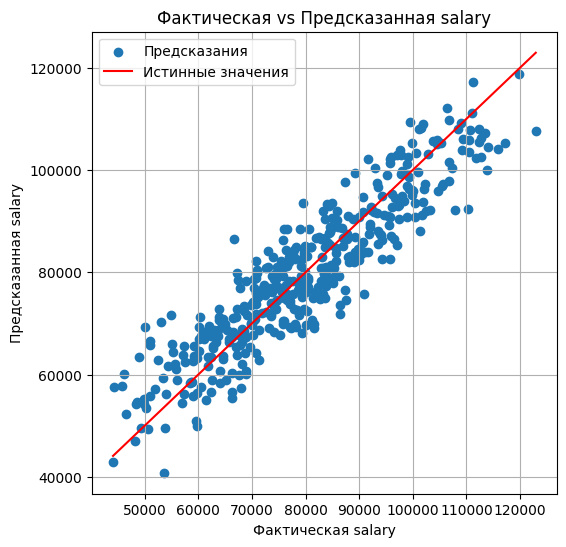

In [19]:
#Визуализация фактического и предсказанного значения
plt.figure(figsize=(6, 6))
plt.scatter(y_valid, y_pred, label='Предсказания')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color='red', label='Истинные значения')
plt.xlabel('Фактическая salary')
plt.ylabel('Предсказанная salary')
plt.title('Фактическая vs Предсказанная salary')
plt.legend()
plt.grid(True)
plt.show()

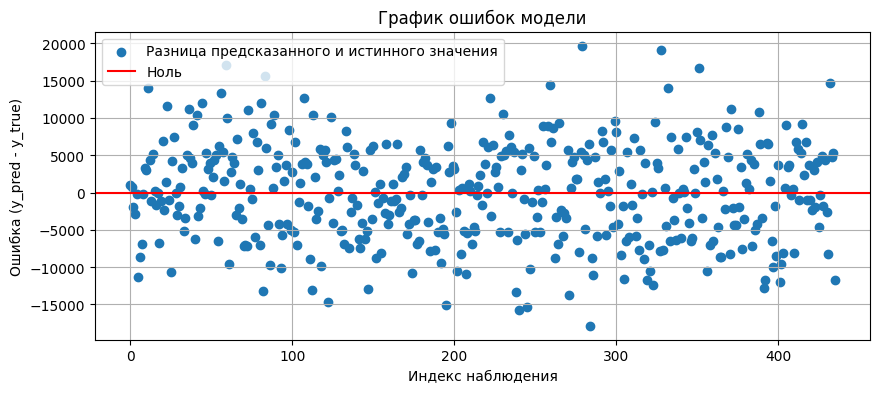

In [20]:
difference = y_pred - y_valid
plt.figure(figsize=(10, 4))
plt.scatter(range(len(difference)), difference, label='Разница предсказанного и истинного значения')
plt.axhline(0, color='red', label='Ноль')
plt.xlabel('Индекс наблюдения')
plt.ylabel('Ошибка (y_pred - y_true)')
plt.title('График ошибок модели')
plt.legend()
plt.grid(True)
plt.show()

#### Регрессия методом k-ближайших соседей

In [21]:
# Нормализация данных для KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_valid_scaled = scaler.transform(X_valid_encoded)

# Обучение KNN с масштабированными данными
knn_improved = KNeighborsRegressor(n_neighbors=10).fit(X_train_scaled, y_train)
y_pred_knn = knn_improved.predict(X_valid_scaled)

# Вывод метрик
mae_knn = mean_absolute_error(y_valid, y_pred_knn)
r2_knn = r2_score(y_valid, y_pred_knn)
print(f"KNN Improved - MAE: {mae_knn:.2f}, R2: {r2_knn:.4f}")

KNN Improved - MAE: 8074.05, R2: 0.5972


R² = 0.5972

- Модель объясняет 59.72% дисперсии зарплат
- Существенное улучшение по сравнению с исходным KNN (0.1121)
- Но всё ещё хуже линейной регрессии (0.8351)

MAE = 8074.05

- Ошибка уменьшилась с 12098 до 8074 единиц
- Но остаётся выше, чем у линейной модели (5319.97)

Сравнение моделей для прогнозирования зарплат:


,MAE,R2
Linear Regression,5319.97,0.8351
Polynomial Regression,5238.95,0.8389
KNN Improved,8074.05,0.5972
KNN Basic,12098.46,0.1121


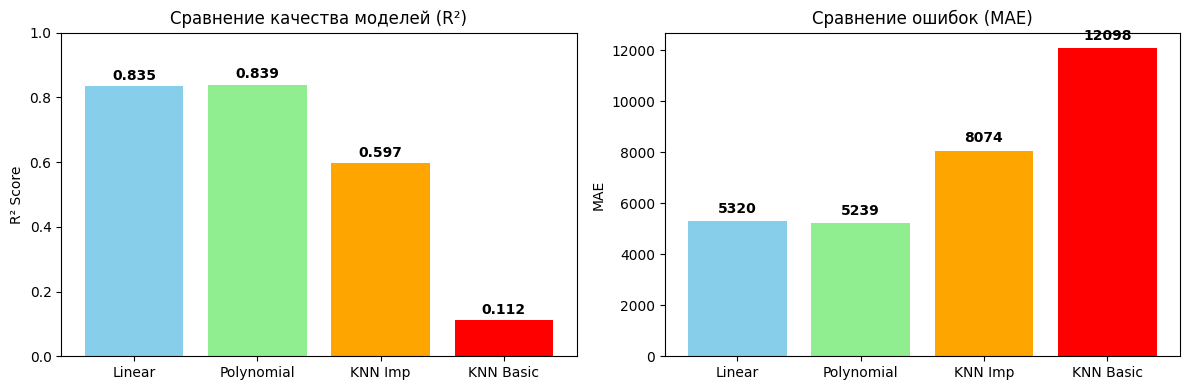

In [22]:
# Сравнительная таблица
models_metrics_salary = {
    'Linear Regression': [5319.97, 0.8351],
    'Polynomial Regression': [5238.95, 0.8389],
    'KNN Improved': [8074.05, 0.5972],
    'KNN Basic': [12098.46, 0.1121]
}

metrics_df = pd.DataFrame(models_metrics_salary, index=['MAE', 'R2']).T
print("Сравнение моделей для прогнозирования зарплат:")
display(metrics_df)

# Компактная визуализация
plt.figure(figsize=(12, 4))

# График 1: Сравнение R²
plt.subplot(1, 2, 1)
models = ['Linear', 'Polynomial', 'KNN Imp', 'KNN Basic']
r2_scores = [0.8351, 0.8389, 0.5972, 0.1121]
colors = ['skyblue', 'lightgreen', 'orange', 'red']
bars = plt.bar(models, r2_scores, color=colors)
plt.ylabel('R² Score')
plt.title('Сравнение качества моделей (R²)')
plt.ylim(0, 1)
# Добавляем значения
for bar, score in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

# График 2: Сравнение MAE
plt.subplot(1, 2, 2)
mae_scores = [5319.97, 5238.95, 8074.05, 12098.46]
bars = plt.bar(models, mae_scores, color=colors)
plt.ylabel('MAE')
plt.title('Сравнение ошибок (MAE)')
# Добавляем значения
for bar, score in zip(bars, mae_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200, 
             f'{score:.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

**Результаты по метрикам качества:**


1. Полиномиальная регрессия - наилучший результат

- R² = 0.8389 (объясняет 83.89% дисперсии)
- MAE = 5238.95 (минимальная ошибка)
- Незначительно превосходит линейную регрессию

2. Линейная регрессия - отличная альтернатива

- R² = 0.8351 (83.51% дисперсии)
- MAE = 5319.97
- Практически идентичное качество с полиномиальной

3. KNN Improved - удовлетворительный результат

- R² = 0.5972 (59.72% дисперсии)
- MAE = 8074.05
- Существенно уступает регрессионным моделям

4. KNN Basic - неудовлетворительное качество

- R² = 0.1121 (всего 11.21% дисперсии)
- MAE = 12098.46
- Непригоден для практического использования

**Вывод**

Полиномиальная регрессия демонстрирует наилучший результат с коэффициентом детерминации 0.8389 и средней абсолютной ошибкой 5238.95, незначительно превосходя линейную регрессию, которая показывает весьма близкие показатели - R² 0.8351 и MAE 5319.97. Оба регрессионных метода существенно превосходят метод k-ближайших соседей, где улучшенная версия KNN показывает скромные результаты с R² 0.5972 и MAE 8074.05, а базовая версия и вовсе непригодна для практического использования с коэффициентом детерминации всего 0.1121. Минимальная разница в качестве между линейной и полиномиальной регрессией при существенно большей сложности последней делает линейную регрессию оптимальным выбором для данной задачи, сочетая высокую точность прогнозирования с простотой интерпретации результатов. Метод k-ближайших соседей, даже после масштабирования данных, показывает ограниченную эффективность для прогнозирования зарплат по имеющимся признакам.

### Дополнительные задания


In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

 Задание 5. Осуществить подбор оптимальных параметров с помощью GridSearchCV для линейной регрессии. Сравнить качество модели для подобранных параметров и любых других.

In [25]:
# Подготовка данных - используем числовые признаки
numeric_features = ['age', 'income', 'experience', 'score_test', 'hours_worked', 
                   'distance_to_work', 'savings', 'debt']

X = df[numeric_features]
y = df['salary']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

# Простая линейная регрессия (базовая модель)
lr_simple = LinearRegression()
lr_simple.fit(X_train, y_train)
y_pred_simple = lr_simple.predict(X_test)

# Метрики для простой модели
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print("Простая линейная регрессия:")
print(f"MSE: {mse_simple:.2f}")
print(f"R²: {r2_simple:.4f}")

# Подбор параметров для Ridge регрессии
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Лучшая модель
best_ridge = grid_search.best_estimator_
y_pred_best = best_ridge.predict(X_test)

# Метрики для лучшей модели
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"\nЛучшие параметры: {grid_search.best_params_}")
print("Ridge регрессия с подобранными параметрами:")
print(f"MSE: {mse_best:.2f}")
print(f"R²: {r2_best:.4f}")

# Сравнение моделей
comparison = pd.DataFrame({
    'Модель': ['Простая', 'Ridge (оптимизированная)'],
    'MSE': [mse_simple, mse_best],
    'R²': [r2_simple, r2_best]
})

display(comparison)

# Сравнение коэффициентов
print("\nКоэффициенты моделей:")
coef_comparison = pd.DataFrame({
    'Признак': numeric_features,
    'Простая модель': lr_simple.coef_,
    'Ridge модель': best_ridge.coef_
})

display(coef_comparison)

Простая линейная регрессия:
MSE: 15553284057.23
R²: 0.0033

Лучшие параметры: {'alpha': 100}
Ridge регрессия с подобранными параметрами:
MSE: 15553258812.74
R²: 0.0033


,Модель,MSE,R²
0,Простая,1.555328e+10,0.003257
1,Ridge (оптимизированная),1.555326e+10,0.003258



Коэффициенты моделей:


,Признак,Простая модель,Ridge модель
0,age,238.142083,238.070297
1,income,0.170543,0.170544
2,experience,784.564723,784.045026
3,score_test,348.890898,348.582786
4,hours_worked,133.609402,133.571573
5,distance_to_work,116.800040,116.679126
6,savings,-0.056772,-0.056747
7,debt,0.222229,0.222306


Обе модели демонстрируют очень низкое качество прогнозирования (R² = 0.0033), что означает, что используемые числовые признаки объясняют лишь 0.33% дисперсии зарплаты. Модели практически идентичны по своим характеристикам - регуляризация в Ridge регрессии с параметром alpha=100 не принесла существенного улучшения. Коэффициенты обеих моделей очень малы относительно масштаба данных, что свидетельствует об отсутствии сильных линейных зависимостей между выбранными признаками и целевой переменной. Основная проблема заключается в том, что числовые характеристики (возраст, доход, опыт и др.) слабо коррелируют с уровнем зарплаты в данной dataset, либо зависимость имеет нелинейный характер, который не может быть адекватно описан линейными моделями.

Задание 6. Осуществить подбор оптимальных параметров с помощью GridSearchCV для kNN. Сравнить качество модели для подобранных параметров и любых других.

In [32]:
# Используем только числовые признаки
numeric_features = ['age', 'income', 'experience', 'score_test', 'hours_worked', 
                   'distance_to_work', 'savings', 'debt']

X_train_numeric = X_train[numeric_features]
X_valid_numeric = X_valid[numeric_features]

# Подбор параметров для kNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsRegressor()
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='r2', n_jobs=-1)
knn_grid_search.fit(X_train_scaled, y_train)

# Лучшая модель kNN
best_knn = knn_grid_search.best_estimator_
y_pred_knn_best = best_knn.predict(X_valid_scaled)

# Метрики для лучшей kNN модели
knn_metrics = {
    'MSE': mean_squared_error(y_valid, y_pred_knn_best),
    'MAE': mean_absolute_error(y_valid, y_pred_knn_best),
    'RMSE': np.sqrt(mean_squared_error(y_valid, y_pred_knn_best)),
    'R2': r2_score(y_valid, y_pred_knn_best)
}

print(f"Лучшие параметры kNN: {knn_grid_search.best_params_}")
print("Метрики оптимизированного kNN:")
for metric, value in knn_metrics.items():
    print(f"{metric}: {value:.6f}")

Лучшие параметры kNN: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
Метрики оптимизированного kNN:
MSE: 1154109262.909667
MAE: 22830.133435
RMSE: 33972.183664
R2: -3.484119


Задание 10. Написать функцию, которая будет перебирать все степени полинома от 1 до 10, а затем выбирать степень, для которой будет лучший R2-score. Функция должна возвращать степень полинома и R2-score. Обучите лучшую модель и сделайте
предсказание с её помощью.

In [33]:
def find_best_polynomial_degree(X_train, X_valid, y_train, y_valid, max_degree=10):
    best_degree = 1
    best_r2 = -float('inf')
    
    for degree in range(1, max_degree + 1):
        # Создание полиномиальных признаков
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = poly.fit_transform(X_train)
        X_valid_poly = poly.transform(X_valid)
        
        # Обучение линейной регрессии
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        
        # Предсказание и оценка
        y_pred = model.predict(X_valid_poly)
        r2 = r2_score(y_valid, y_pred)
        
        print(f"Степень {degree}: R² = {r2:.6f}")
        
        if r2 > best_r2:
            best_degree = degree
            best_r2 = r2
    
    return best_degree, best_r2

# Используем числовые признаки
numeric_features = ['age', 'income', 'experience', 'score_test', 'hours_worked', 
                   'distance_to_work', 'savings', 'debt']

X_train_numeric = X_train[numeric_features]
X_valid_numeric = X_valid[numeric_features]

# Поиск лучшей степени полинома
best_degree, best_r2 = find_best_polynomial_degree(X_train_numeric, X_valid_numeric, y_train, y_valid)

print(f"\nЛучшая степень полинома: {best_degree}")
print(f"Лучший R²: {best_r2:.6f}")

# Обучение лучшей модели
poly_best = PolynomialFeatures(degree=best_degree, include_bias=False)
X_train_best_poly = poly_best.fit_transform(X_train_numeric)
X_valid_best_poly = poly_best.transform(X_valid_numeric)

best_poly_model = LinearRegression()
best_poly_model.fit(X_train_best_poly, y_train)

# Предсказание лучшей моделью
y_pred_best_poly = best_poly_model.predict(X_valid_best_poly)

# Метрики лучшей полиномиальной модели
poly_metrics = {
    'MSE': mean_squared_error(y_valid, y_pred_best_poly),
    'MAE': mean_absolute_error(y_valid, y_pred_best_poly),
    'RMSE': np.sqrt(mean_squared_error(y_valid, y_pred_best_poly)),
    'R2': r2_score(y_valid, y_pred_best_poly)
}

print("\nМетрики лучшей полиномиальной модели:")
for metric, value in poly_metrics.items():
    print(f"{metric}: {value:.6f}")

Степень 1: R² = -0.559729
Степень 2: R² = -1.512017
Степень 3: R² = -3.753424
Степень 4: R² = -31.461717
Степень 5: R² = -101.257911
Степень 6: R² = -140949.748041
Степень 7: R² = -1127199.409938
Степень 8: R² = -94077.405818
Степень 9: R² = -14196235.683525
Степень 10: R² = -169896575.459435

Лучшая степень полинома: 1
Лучший R²: -0.559729

Метрики лучшей полиномиальной модели:
MSE: 401438445.294615
MAE: 17422.074172
RMSE: 20035.928860
R2: -0.559729


Задание 14. Выполнить по вариантам из части 1 множественную линейную регрессию. Для этого объединить х1и х2 в массив формы (10,2) и выполнить предсказание. Вывести значение коэффициентов а и b. Вывести датафрейм с предсказанными и истинными значениями.

In [39]:
# Загружаем данные
df = pd.read_excel('regression.xlsx')

# Множественная линейная регрессия для x1 и x2
X_multi = df[['x1', 'x2']]
y_multi = df['y']

# Разделение на обучающую и валидационную выборки
X_train_multi, X_valid_multi, y_train_multi, y_valid_multi = train_test_split(
    X_multi, y_multi, test_size=0.25, random_state=22
)

# Обучение модели множественной регрессии
model_multiple = LinearRegression()
model_multiple.fit(X_train_multi, y_train_multi)

# Вывод коэффициентов
a1, a2 = model_multiple.coef_
b = model_multiple.intercept_

print("Коэффициенты множественной линейной регрессии:")
print(f"a1 (коэффициент для x1) = {a1:.6f}")
print(f"a2 (коэффициент для x2) = {a2:.6f}")
print(f"b (свободный член) = {b:.6f}")

# Предсказание
y_pred_multiple = model_multiple.predict(X_valid_multi)

# Датафрейм с предсказанными и истинными значениями
result_multiple_df = pd.DataFrame({
    'Actual': y_valid_multi,
    'Predicted_multiple': y_pred_multiple
})

print("\nДатафрейм с предсказанными и истинными значениями:")
display(result_multiple_df.head(10))

# Метрики качества
multi_metrics = {
    'MSE': mean_squared_error(y_valid_multi, y_pred_multiple),
    'MAE': mean_absolute_error(y_valid_multi, y_pred_multiple),
    'RMSE': np.sqrt(mean_squared_error(y_valid_multi, y_pred_multiple)),
    'R2': r2_score(y_valid_multi, y_pred_multiple)
}

print("\nМетрики множественной линейной регрессии:")
for metric, value in multi_metrics.items():
    print(f"{metric}: {value:.6f}")

Коэффициенты множественной линейной регрессии:
a1 (коэффициент для x1) = 1.298272
a2 (коэффициент для x2) = 0.851140
b (свободный член) = -0.024105

Датафрейм с предсказанными и истинными значениями:


,Actual,Predicted_multiple
866,-0.922265,-0.984366
191,-1.824254,-0.204470
732,1.521499,1.241763
657,-0.682401,0.866339
155,0.414984,0.138187
452,0.320048,0.444997
412,0.248476,0.096990
865,0.374229,-0.681936
902,1.381574,1.465206
951,0.950565,1.002826



Метрики множественной линейной регрессии:
MSE: 0.601583
MAE: 0.586525
RMSE: 0.775618
R2: 0.822564


Задание 15. Сделать столбчатые диаграммы по категориальным столбцам. Выяснить, какие сотрудники преобладают в датасете (из какого города, с каким уровнем
образования) и т.п. Оценить влияние категориальных столбцов на регрессию
(важность признаков).

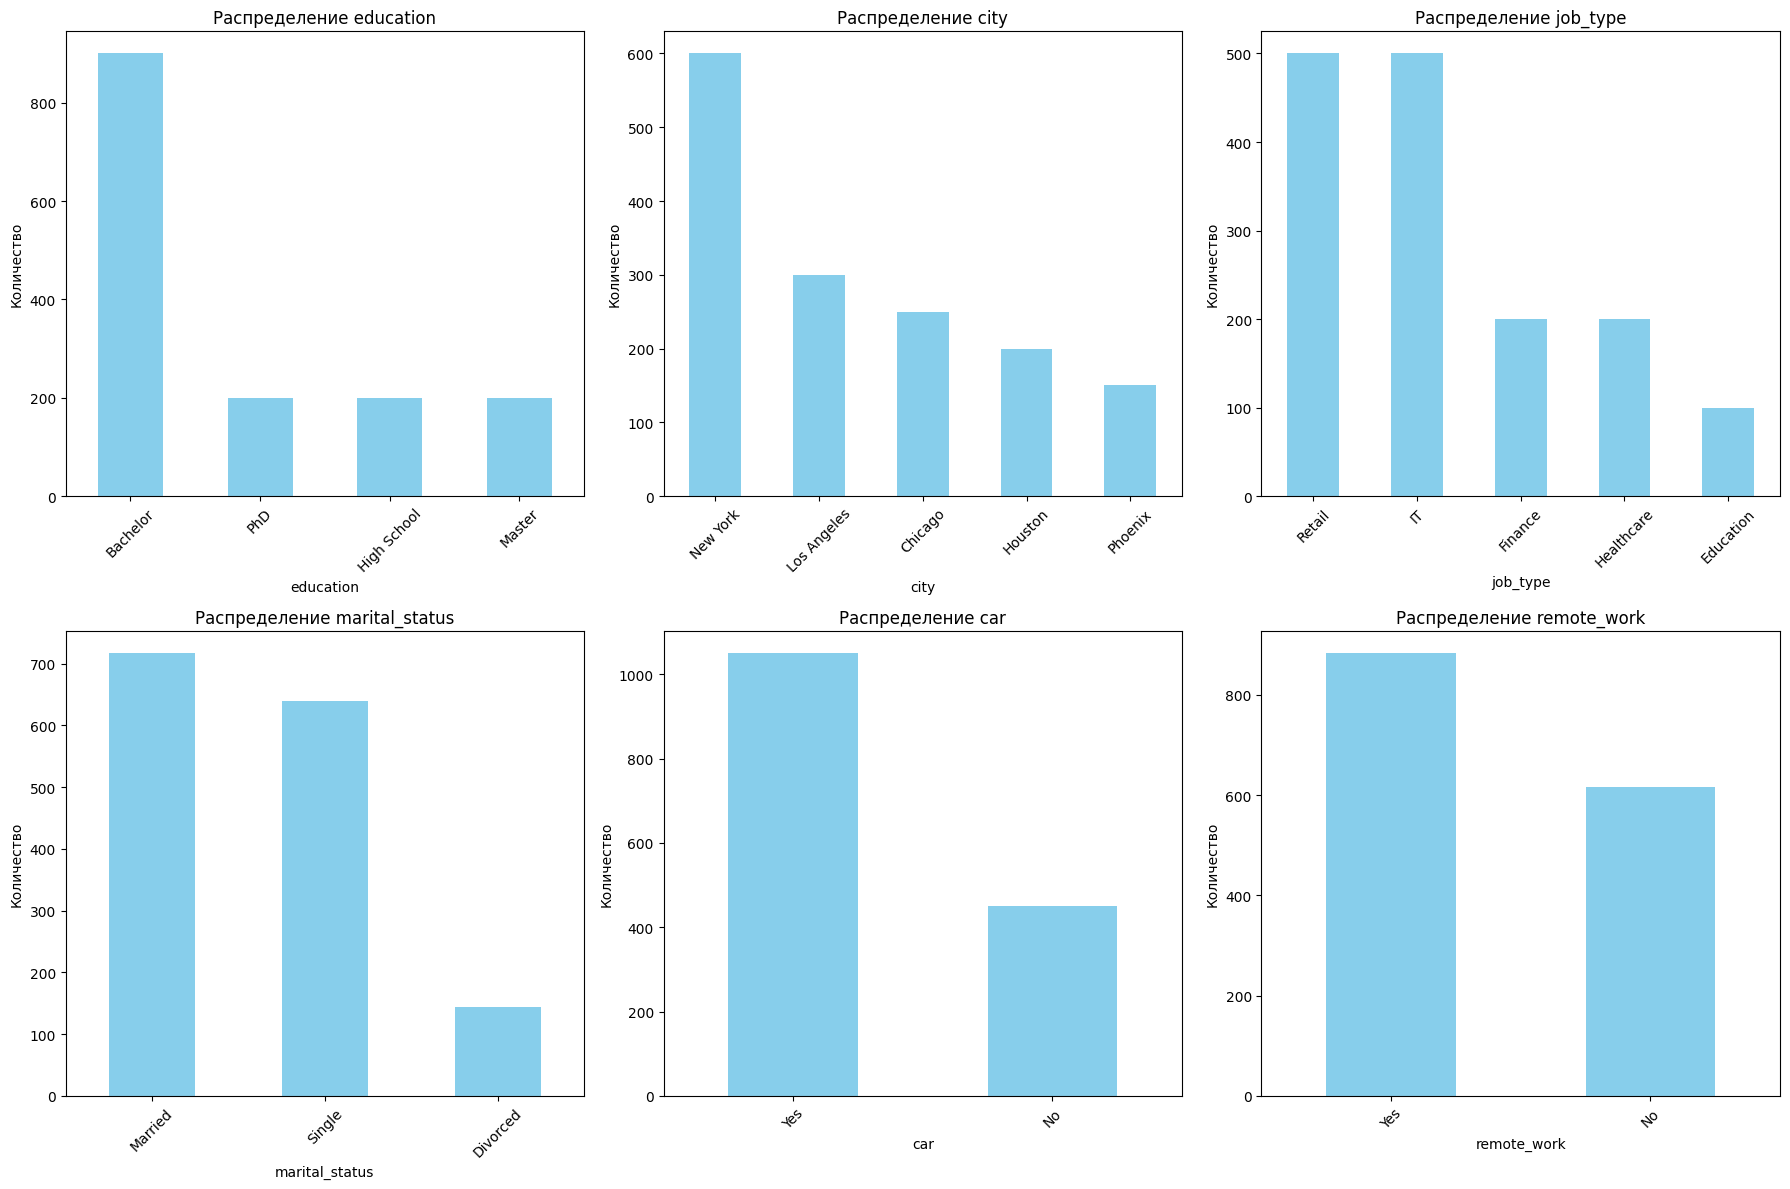

Преобладающие категории в датасете:
education: Bachelor (900 сотрудников, 60.0%)
city: New York (600 сотрудников, 40.0%)
job_type: Retail (500 сотрудников, 33.3%)
marital_status: Married (717 сотрудников, 47.8%)
car: Yes (1050 сотрудников, 70.0%)
remote_work: Yes (883 сотрудников, 58.9%)

Средняя зарплата по категориям:

education:


,mean,count
education,,
PhD,111223.816391,200
Master,107014.910913,200
Bachelor,96239.583344,900
High School,87981.349055,200



city:


,mean,count
city,,
Houston,103588.609660,200
Chicago,100774.185457,250
New York,98528.397283,600
Los Angeles,95660.573923,300
Phoenix,94221.076256,150



job_type:


,mean,count
job_type,,
Retail,104662.707399,500
Healthcare,101561.250238,200
Finance,95456.559454,200
IT,93808.645599,500
Education,92204.018439,100



marital_status:


,mean,count
marital_status,,
Married,98762.909685,717
Single,98650.785450,639
Divorced,97283.209266,144



car:


,mean,count
car,,
No,108159.994757,450
Yes,94464.421563,1050



remote_work:


,mean,count
remote_work,,
Yes,103256.553537,883
No,91870.508116,617


In [41]:
# Загружаем данные salary.csv заново
df_salary = pd.read_csv('salary.csv')

# Визуализация категориальных признаков
categorical_columns = ['education', 'city', 'job_type', 'marital_status', 'car', 'remote_work']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_columns):
    df_salary[col].value_counts().plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Количество')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Анализ преобладающих категорий
print("Преобладающие категории в датасете:")
for col in categorical_columns:
    most_common = df_salary[col].value_counts().index[0]
    count = df_salary[col].value_counts().iloc[0]
    percentage = (count / len(df_salary)) * 100
    print(f"{col}: {most_common} ({count} сотрудников, {percentage:.1f}%)")

# Влияние категориальных признаков на зарплату
print("\nСредняя зарплата по категориям:")
for col in categorical_columns:
    print(f"\n{col}:")
    salary_by_category = df_salary.groupby(col)['salary'].agg(['mean', 'count'])
    salary_by_category = salary_by_category.sort_values('mean', ascending=False)
    display(salary_by_category)


Важность признаков в регрессии:


,Признак,Коэффициент,Важность (abs)
4,car,-20354.319462,20354.319462
5,remote_work,9553.698544,9553.698544
0,education,3822.491947,3822.491947
2,job_type,2193.836219,2193.836219
3,marital_status,-2177.878800,2177.878800
1,city,-852.619986,852.619986
8,experience,751.076456,751.076456
9,score_test,328.048403,328.048403
6,age,234.784316,234.784316
10,hours_worked,147.940748,147.940748


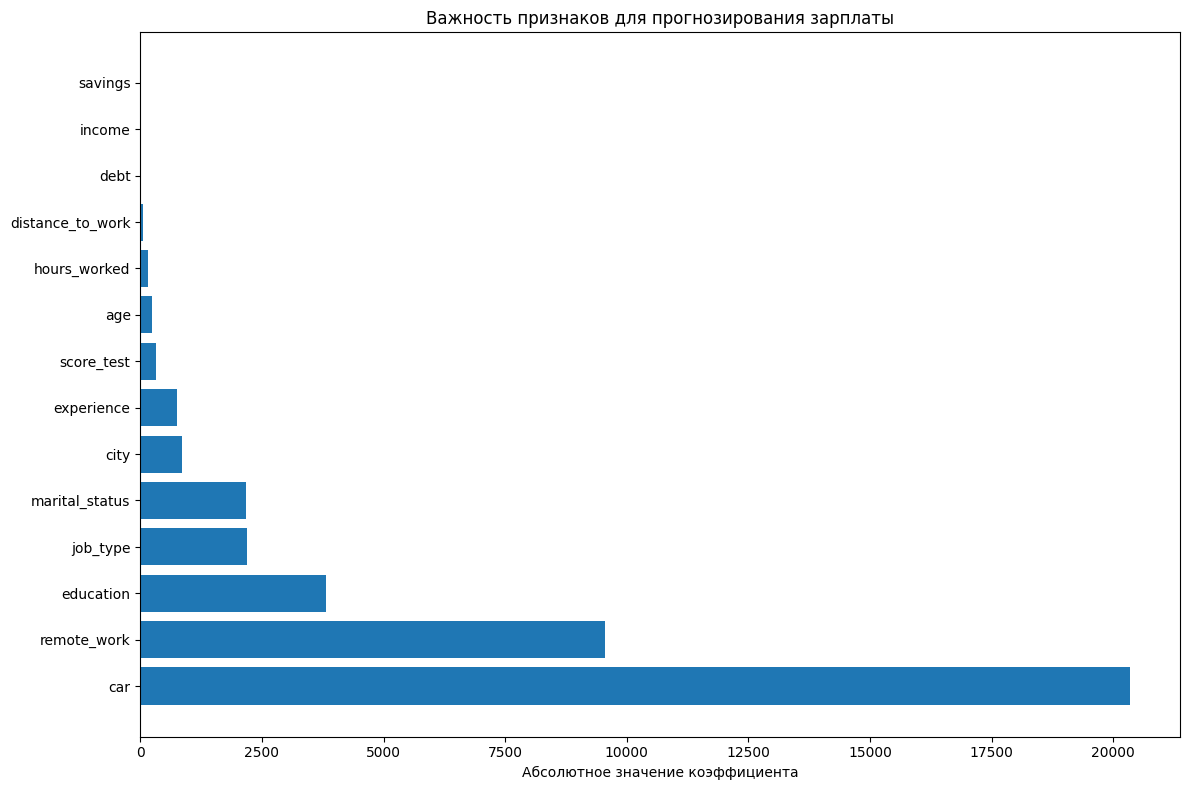


R² модели с категориальными признаками: -0.0013


In [42]:
# Кодирование категориальных признаков для оценки важности
from sklearn.preprocessing import LabelEncoder

# Создаем копию данных для кодирования
df_encoded = df_salary.copy()

# Кодируем категориальные признаки
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_salary[col].astype(str))
    label_encoders[col] = le

# Числовые признаки
numeric_features = ['age', 'income', 'experience', 'score_test', 'hours_worked', 
                   'distance_to_work', 'savings', 'debt']

# Подготовка данных для регрессии
X_cat = df_encoded[categorical_columns + numeric_features]
y_cat = df_encoded['salary']

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(
    X_cat, y_cat, test_size=0.25, random_state=22
)

# Обучение модели с категориальными признаками
model_cat = LinearRegression()
model_cat.fit(X_train_cat, y_train_cat)

# Важность признаков
feature_importance = pd.DataFrame({
    'Признак': categorical_columns + numeric_features,
    'Коэффициент': model_cat.coef_,
    'Важность (abs)': np.abs(model_cat.coef_)
}).sort_values('Важность (abs)', ascending=False)

print("\nВажность признаков в регрессии:")
display(feature_importance)

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Признак'], feature_importance['Важность (abs)'])
plt.title('Важность признаков для прогнозирования зарплаты')
plt.xlabel('Абсолютное значение коэффициента')
plt.tight_layout()
plt.show()

# Качество модели с категориальными признаками
y_pred_cat = model_cat.predict(X_test_cat)
r2_cat = r2_score(y_test_cat, y_pred_cat)
print(f"\nR² модели с категориальными признаками: {r2_cat:.4f}")